In [1]:
# This notobook connects to the azure cloud and reads in the volve dataset.
# Further work will go into showing how to explore the dataset
# How to look at the different type of folders and what files each of them contain
# and how to perform operations/read in the a specific files and import it into pandas or xarray
# More informations on the file can be found here
# I figured out how to connect to the file by following the setps n the link below as well
# https://frombitumentobinary.com/volve-dataset-exploration.html
# More information here https://www.equinor.com/en/how-and-why/digitalisation-in-our-dna/volve-field-data-village-download.html

In [ ]:
from azure.storage.blob import BlockBlobService
import pandas as pd
import xml.etree.ElementTree as ET
from bs4 import BeautifulSoup
from collections import defaultdict
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline

In [2]:
# List the account name and sas_token *** I have removed the SAS token in order to allow the user to register properly thorugh Equinor's data portal
#azure_storage_account_name = 'datavillagesa'
azure_storage_account_name = 'datavillagesa'
sas_token = 'sv=2018-03-28&sr=c&sig=FNDgr%2F3XMiqowXZyuQTLk8SVuBHSKbWQHCqbeK06eSQ%3D&se=2020-10-15T19%3A07%3A24Z&sp=rl'

# Create a service and use the SAS 
sas_blob_service = BlockBlobService( 
    account_name=azure_storage_account_name, 
    sas_token=sas_token)

filename = 'WITSML Realtime drilling data/'

blob = sas_blob_service.list_blobs('volve', filename)
blob

In [3]:
# Initialize count variable
x = 0
print_var = False
# Initialize dictionary - defaultdict initialized every key to 0
sub_dirs = defaultdict(int)
# Iterate through list generator
for b in blob:
    x+=1
    # Perform this test to avoid files directly under the WITSML folder
    if len(b.name.split('/')) > 2:
        sub_dirs[b.name.split('/')[1]] += 1
        # Not the prettiest way to show an exmample folder structure
        if not print_var and len(b.name.split('/')) > 5:
            print(b.name)
            print_var = True

print('Total Number of Files in WITSML folder: ' + str(x))
print('Total Number of Folders under WITSML folder: ' + str(len(sub_dirs)))
well_names = set(x[x.find('1'):] for x in sub_dirs.keys())
print('Total number of wells: ' + str(len(well_names)))
print('Folders contained under WITSML Folder: ')
for key in sub_dirs.keys():
    print(key)

WITSML Realtime drilling data/NA-NA-15_$47$_9-F-5/1/log/1/1/1/00001.xml
Total Number of Files in WITSML folder: 20087
Total Number of Folders under WITSML folder: 26
Total number of wells: 17
Folders contained under WITSML Folder: 
NA-NA-15_$47$_9-F-5
Norway-NA-15_$47$_9-F-1 C
Norway-NA-15_$47$_9-F-1
Norway-NA-15_$47$_9-F-11 B
Norway-NA-15_$47$_9-F-9 A
Norway-Statoil-15_$47$_9-F-12
Norway-Statoil-15_$47$_9-F-7
Norway-Statoil-NO 15_$47$_9-F-1 B
Norway-Statoil-NO 15_$47$_9-F-1 C
Norway-Statoil-NO 15_$47$_9-F-11
Norway-Statoil-NO 15_$47$_9-F-12
Norway-Statoil-NO 15_$47$_9-F-14
Norway-Statoil-NO 15_$47$_9-F-15
Norway-Statoil-NO 15_$47$_9-F-4
Norway-Statoil-NO 15_$47$_9-F-5
Norway-Statoil-NO 15_$47$_9-F-7
Norway-Statoil-NO 15_$47$_9-F-9
Norway-StatoilHydro-15_$47$_9-F-10
Norway-StatoilHydro-15_$47$_9-F-14
Norway-StatoilHydro-15_$47$_9-F-15
Norway-StatoilHydro-15_$47$_9-F-15A
Norway-StatoilHydro-15_$47$_9-F-15B
Norway-StatoilHydro-15_$47$_9-F-15S
Norway-StatoilHydro-15_$47$_9-F-4
Norway-Stat

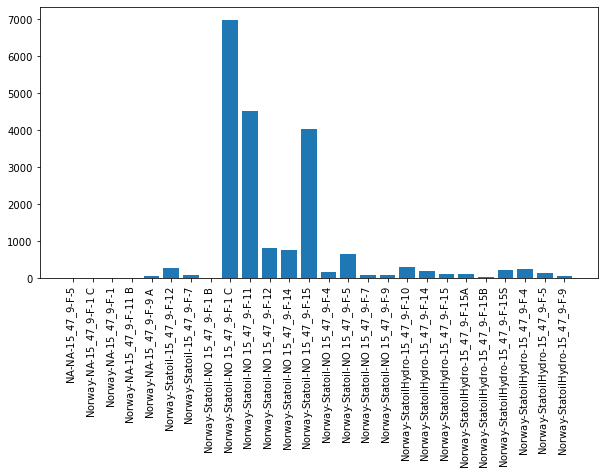

In [4]:
plt.figure(figsize = (10,5))
plt.bar(range(len(sub_dirs)), list(sub_dirs.values()), align='center')
plt.xticks(range(len(sub_dirs)), list(sub_dirs.keys()), rotation='vertical')
plt.show()

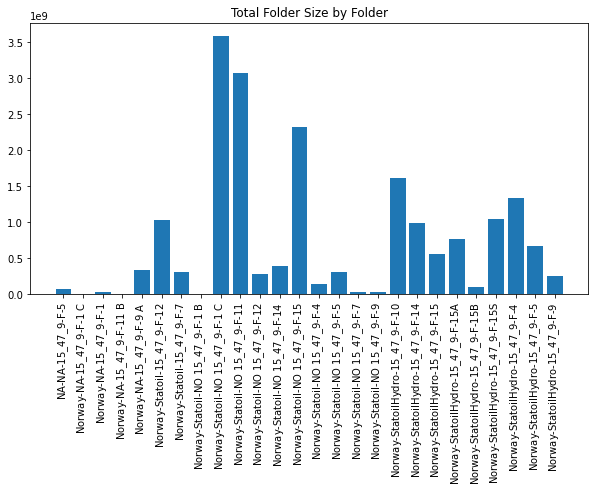

In [5]:
# A list generator can only be iterated over once - so we have to re-query the Azure Storage
blob = sas_blob_service.list_blobs('volve', filename)
# Initialize dictionary - defaultdict initialized every key to 0
sub_dirs_length = defaultdict(int)
# Iterate through list generator
for b in blob:
    x+=1
    # Perform this test to avoid files directly under the WITSML folder
    if len(b.name.split('/')) > 2:
        # Total the blob size in bytes
        sub_dirs_length[b.name.split('/')[1]] += b.properties.content_length

plt.figure(figsize = (10,5))
plt.bar(range(len(sub_dirs_length)), list(sub_dirs_length.values()), align='center')
plt.xticks(range(len(sub_dirs_length)), list(sub_dirs_length.keys()), rotation='vertical')
plt.title('Total Folder Size by Folder')
plt.show()

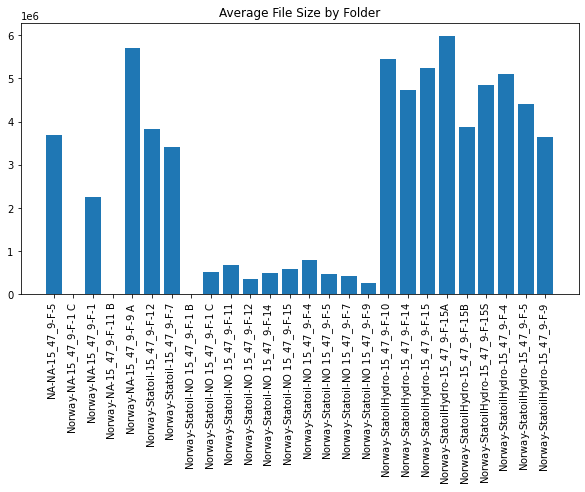

In [6]:
# Loop through keys and divide by number of files (from previous code cell)
for key in sub_dirs_length.keys():
    sub_dirs_length[key] = sub_dirs_length[key] / sub_dirs[key]

plt.figure(figsize = (10,5))
plt.bar(range(len(sub_dirs_length)), list(sub_dirs_length.values()), align='center')
plt.xticks(range(len(sub_dirs_length)), list(sub_dirs_length.keys()), rotation='vertical')
plt.title('Average File Size by Folder')
plt.show()

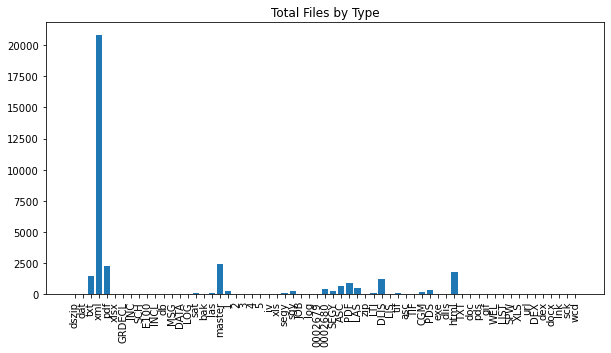

In [7]:
# Look at all files in Volve Dataset
blob = sas_blob_service.list_blobs('volve')
# Initialize dictionary - defaultdict initialized every key to 0
file_type = defaultdict(int)
# Iterate through list generator
for b in blob:
    # Perform this test to avoid folder structures
    if len(b.name.split('.')[-1]) < 10:
        # Total count of file type
        file_type[b.name.split('.')[-1]] += 1
# Filter for only file types having count > 1
file_type_filter = {}
for (key, value) in file_type.items():
    if value > 1:
        file_type_filter[key] = value

plt.figure(figsize = (10,5))
plt.bar(range(len(file_type_filter)), list(file_type_filter.values()), align='center')
plt.xticks(range(len(file_type_filter)), list(file_type_filter.keys()), rotation='vertical')
plt.title('Total Files by Type')
plt.show()

In [89]:
# List the account name and sas_token *** I have removed the SAS token in order to allow the user to register properly thorugh Equinor's data portal
#azure_storage_account_name = 'datavillagesa'
azure_storage_account_name = 'datavillagesa'
sas_token = 'sv=2018-03-28&sr=c&sig=FNDgr%2F3XMiqowXZyuQTLk8SVuBHSKbWQHCqbeK06eSQ%3D&se=2020-10-15T19%3A07%3A24Z&sp=rl'

# Create a service and use the SAS 
sas_blob_service = BlockBlobService( 
    account_name=azure_storage_account_name, 
    sas_token=sas_token)

filename = 'WITSML Realtime drilling data/'

blob = sas_blob_service.list_blobs('volve', filename)
blob

In [95]:
for y in sas_blob_service:
    y

TypeError: 'BlockBlobService' object is not iterable